In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
df = pd.read_csv("data/proccessed.csv", index_col=0)
df.head()

,id,party_name,descriptions,gender,is_foreigner,location,roots,lemmatized
0,00000023-93ee-4754-a3c4-5748a4f420ad,STAN,hasič;Všeruby (Domažlice);ex-zast_obec;ex-kand...,1,2,554456,"['hasit', 'všerub', 'domažlice', 'ex', 'zastou...","['hasič', 'všeruby', 'domažlice', 'ex', 'zastu..."
1,0000d8c9-28cf-457b-a1ff-751e3d1fac3c,BEZPP,Potravinářská komora České republiky;lobby;mluvčí,2,2,0,"['trávit', 'komora', 'Čech', 'republika', 'lob...","['potravinářský', 'komora', 'český', 'republik..."
2,00017467-20c1-4151-9126-088f9bff86e9,BEZPP,umělec;dirigent,1,2,0,"['umět', 'dirigovat']","['umělec', 'dirigent']"
3,0002bfa9-c1e6-4fae-acfd-6e32481e7fd5,BEZPP,umělec;básnířka,2,2,0,"['umět', 'bát']","['umělec', 'básnířka']"
4,00040844-ca87-4a12-b394-eecd78a0166f,BEZPP,mluvčí Rožnov pod Radhoštěm;umělec;grafička a ...,2,2,0,"['mluvit', 'rožnov', 'radhošten', 'umět', 'kar...","['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g..."


In [3]:
df = df.drop(columns=['id', 'descriptions', 'location'])
df.head()

,party_name,gender,is_foreigner,roots,lemmatized
0,STAN,1,2,"['hasit', 'všerub', 'domažlice', 'ex', 'zastou...","['hasič', 'všeruby', 'domažlice', 'ex', 'zastu..."
1,BEZPP,2,2,"['trávit', 'komora', 'Čech', 'republika', 'lob...","['potravinářský', 'komora', 'český', 'republik..."
2,BEZPP,1,2,"['umět', 'dirigovat']","['umělec', 'dirigent']"
3,BEZPP,2,2,"['umět', 'bát']","['umělec', 'básnířka']"
4,BEZPP,2,2,"['mluvit', 'rožnov', 'radhošten', 'umět', 'kar...","['mluvčí', 'rožnov', 'radhoštěm', 'umělec', 'g..."


In [4]:
from src.utils import string_to_list
df.roots = df.roots.apply(string_to_list)
df.lemmatized = df.lemmatized.apply(string_to_list)


In [5]:
std = ['advokát', 'akademik', 'aktivista', 'blogger', 'byznys', 
'celebrita', 'církev', 'europol', 'komentátor', 'kontrolor', 
'kultura', 'léčitel', 'lobby', 'zdravotník', 'mluvčí', 'ngo', 
'novinář', 'odborník', 'odbory', 'ostatní', 'ombudsman', 
'ozbrojenec', 'politik', 'social', 'soudce', 'soudce_us', 
'spolek', 'sport', 'starosta', 'stát_byznys', 'ttank', 
'umělec', 'úředník', 'vyslanec', 'zaměstnavatel', 'zástupce', 
'záchranář', 'média', 'mezinárodní']

df['is_labeled'] = df.lemmatized.apply(lambda row: len([x for x in row if x in std]) != 0)
df.head()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled
0,STAN,1,2,"[hasit, všerub, domažlice, ex, zastoupit, obec...","[hasič, všeruby, domažlice, ex, zastupitel, ob...",False
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",True


In [6]:
df['is_pol'] = df.party_name.apply(lambda x: x != 'BEZPP')

In [7]:
df.head()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol
0,STAN,1,2,"[hasit, všerub, domažlice, ex, zastoupit, obec...","[hasič, všeruby, domažlice, ex, zastupitel, ob...",False,True
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",True,False


In [8]:
from src.utils import to_bag_of_words
bag_of_words = to_bag_of_words(df.roots, is_string=False)
bag_of_words.head()

,aaa,aalborg,aarhus,abatyše,abd,abeceda,abertam,about,abrahámova,absint,...,žár,žíla,žít,žítková,žížala,žďas,žďár,žďárce,žďársek,žďársko
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(len(bag_of_words.loc[:,bag_of_words.sum() > 1].columns))

7253


In [10]:
df['roots_n'] = df.roots.apply(lambda row: len(row))

In [11]:
df[df.roots_n == 0]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n
14794,BEZPP,2,2,[],[],False,False,0
66373,BEZPP,1,2,[],[],False,False,0
71044,BEZPP,1,2,[],[],False,False,0


In [12]:
non_politic_bag = bag_of_words.loc[~df.is_pol, bag_of_words.sum() > 1].copy()

In [13]:
non_politic = df.loc[~df.is_pol,:].copy()
display(non_politic.head())
print(len(non_politic))

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False,6
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False,2
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False,2
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",True,False,6
5,BEZPP,1,2,"[hrát, umět]","[herec, umělec]",True,False,2


63939


In [14]:
non_politic_bag = non_politic_bag.loc[:, non_politic_bag.sum() > 1]  
display(non_politic_bag.head())

,aaa,abertam,absolvovat,absorbovat,academ,academia,accol,acidum,ackermann,acomware,...,žula,župa,žurnál,žába,žák,žár,žít,žďár,žďársek,žďársko
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from pandarallel import pandarallel
pandarallel.initialize()
non_politic['useful roots'] = non_politic_bag.parallel_apply(lambda row: row.sum(), axis=1)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
non_politic[non_politic['useful roots'] == 0]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
165,BEZPP,1,2,"[x, a]","[x, y]",False,False,2,0
4065,BEZPP,1,2,[procedura],[procedura],False,False,1,0
14794,BEZPP,2,2,[],[],False,False,0,0
20368,BEZPP,1,2,[jihočech],[jihočeši],False,False,1,0
24819,BEZPP,1,2,[čistéměsto],[čistéměsto],False,False,1,0
27623,BEZPP,1,2,[land],[landa],False,False,1,0
32001,BEZPP,2,2,[samosoud],[samosoudkyně],False,False,1,0
33516,BEZPP,1,2,[kajakářsport],[kajakářsport],False,False,1,0
36838,BEZPP,2,2,[dlouhovlasý],[dlouhovláska],False,False,1,0
66373,BEZPP,1,2,[],[],False,False,0,0


In [17]:
non_politic[non_politic['useful roots'] == 1]

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
37,BEZPP,1,2,[chránit],[záchranář],True,False,1,1
198,BEZPP,1,2,"[lori, mluvit]","[lorie, mluvčí]",True,False,2,1
219,BEZPP,1,2,"[psychopatie, vzít]","[psychopat, odborník]",True,False,2,1
298,BEZPP,2,2,"[umět, umět]","[umělkyně, umělec]",True,False,2,1
338,BEZPP,1,2,[soudit],[soudce],True,False,1,1
...,...,...,...,...,...,...,...,...,...
81505,BEZPP,1,2,[fundraiser],[fundraiser],False,False,1,1
81572,BEZPP,2,2,[stroj],[strojovna],False,False,1,1
81577,BEZPP,2,2,"[advokát, advokát]","[advokát, advokátka]",True,False,2,1
81589,BEZPP,2,2,"[nový, nový]","[novinář, novinářka]",True,False,2,1


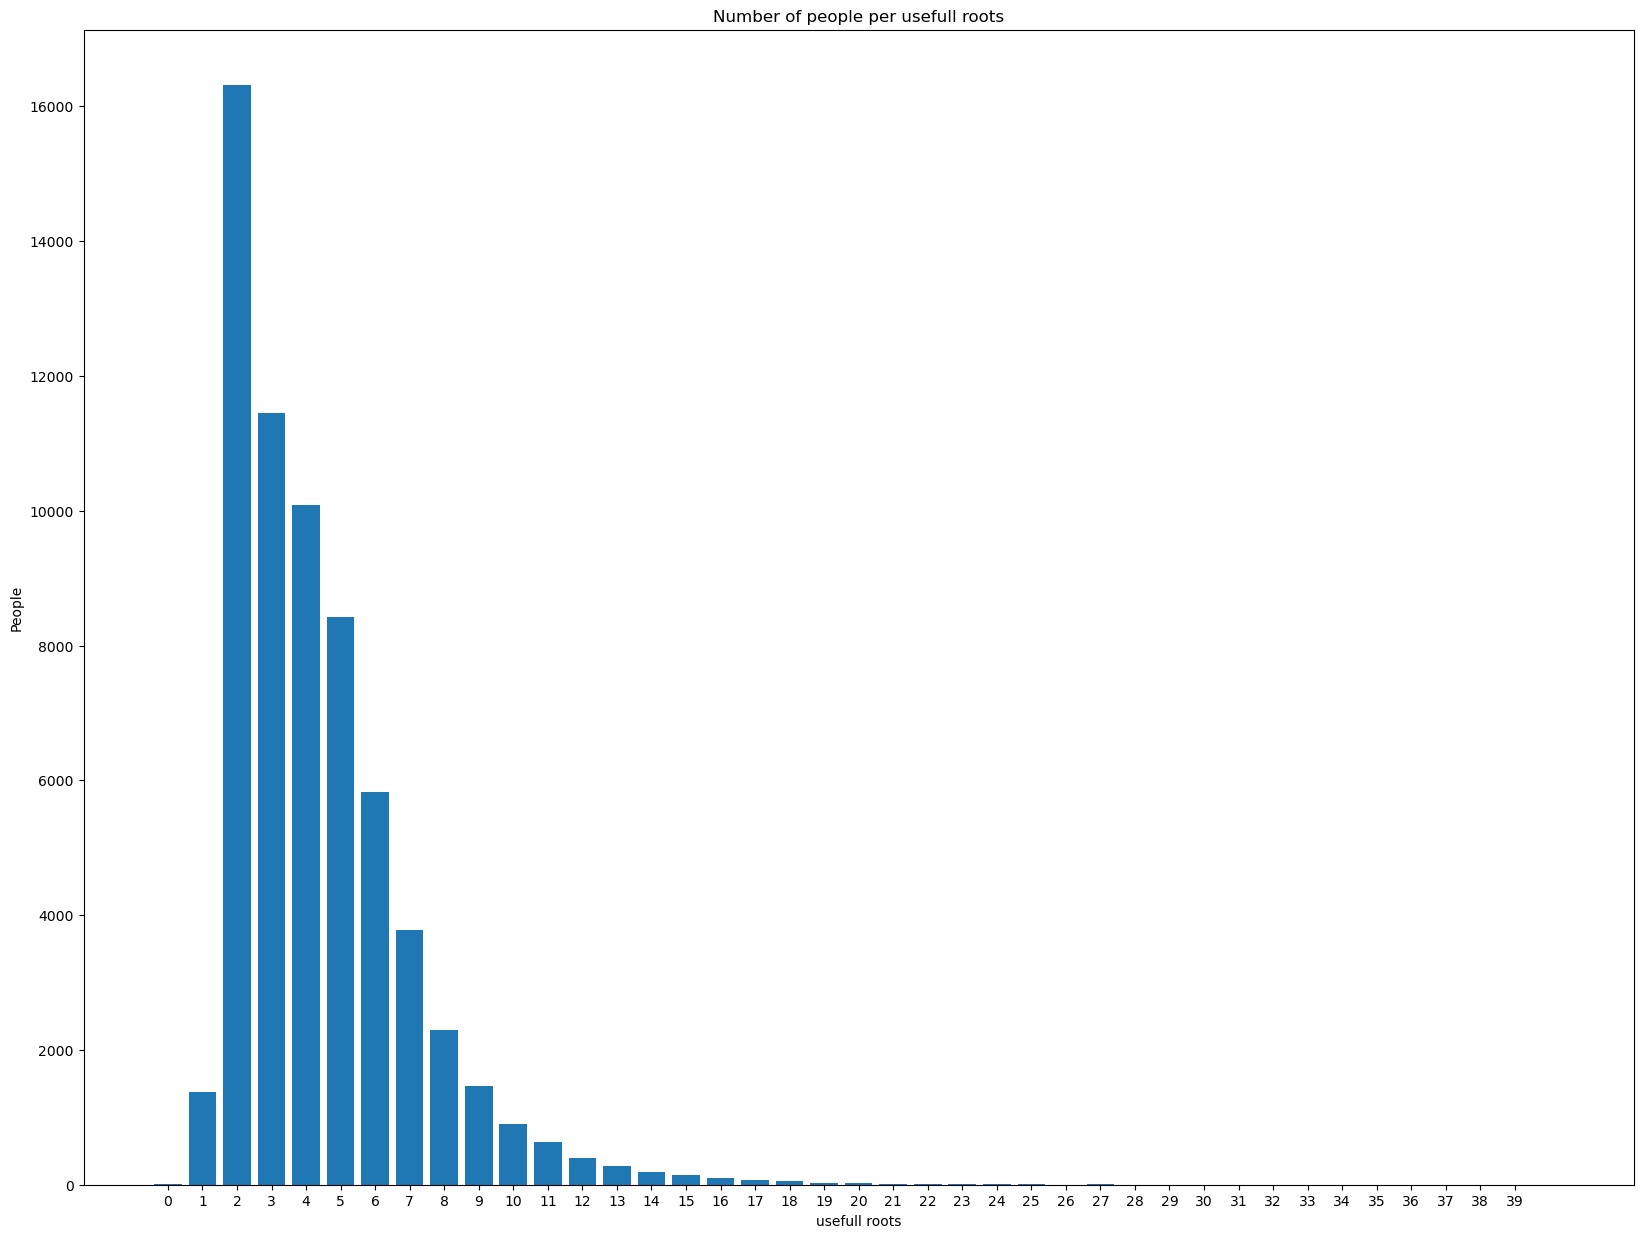

In [18]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
stuff = [non_politic['useful roots'][non_politic['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

,party_name,gender,is_foreigner,roots,lemmatized,is_labeled,is_pol,roots_n,useful roots
1,BEZPP,2,2,"[trávit, komora, Čech, republika, lobby, mluvit]","[potravinářský, komora, český, republika, lobb...",True,False,6,6
2,BEZPP,1,2,"[umět, dirigovat]","[umělec, dirigent]",True,False,2,2
3,BEZPP,2,2,"[umět, bát]","[umělec, básnířka]",True,False,2,2
4,BEZPP,2,2,"[mluvit, rožnov, radhošten, umět, karta, tvořit]","[mluvčí, rožnov, radhoštěm, umělec, grafička, ...",True,False,6,6
5,BEZPP,1,2,"[hrát, umět]","[herec, umělec]",True,False,2,2
...,...,...,...,...,...,...,...,...,...
81619,BEZPP,2,2,"[vzít, řídit, gymnázium]","[odborník, ředitelka, gymnázium]",True,False,3,3
81620,BEZPP,1,2,"[sport, basebal]","[sport, baseballista]",True,False,2,2
81621,BEZPP,1,2,"[jednat, spolu, agrese, spol, r, sanovat, podn...","[jednatel, společnost, agrese, spol, r, asanač...",True,False,9,8
81622,BEZPP,1,2,"[sport, kužel, prezentovat]","[sport, kuželka, reprezentace]",True,False,3,3


Index(['party_name', 'gender', 'is_foreigner', 'roots', 'lemmatized',
       'is_labeled', 'is_pol', 'roots_n', 'useful roots'],
      dtype='object')

[0, 1158, 15790, 10672, 9143, 7444, 5054, 3265, 1991, 1305, 803, 590, 362, 256, 179, 135, 101, 66, 51, 24, 28, 14, 11, 8, 5, 8, 3, 4, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2]


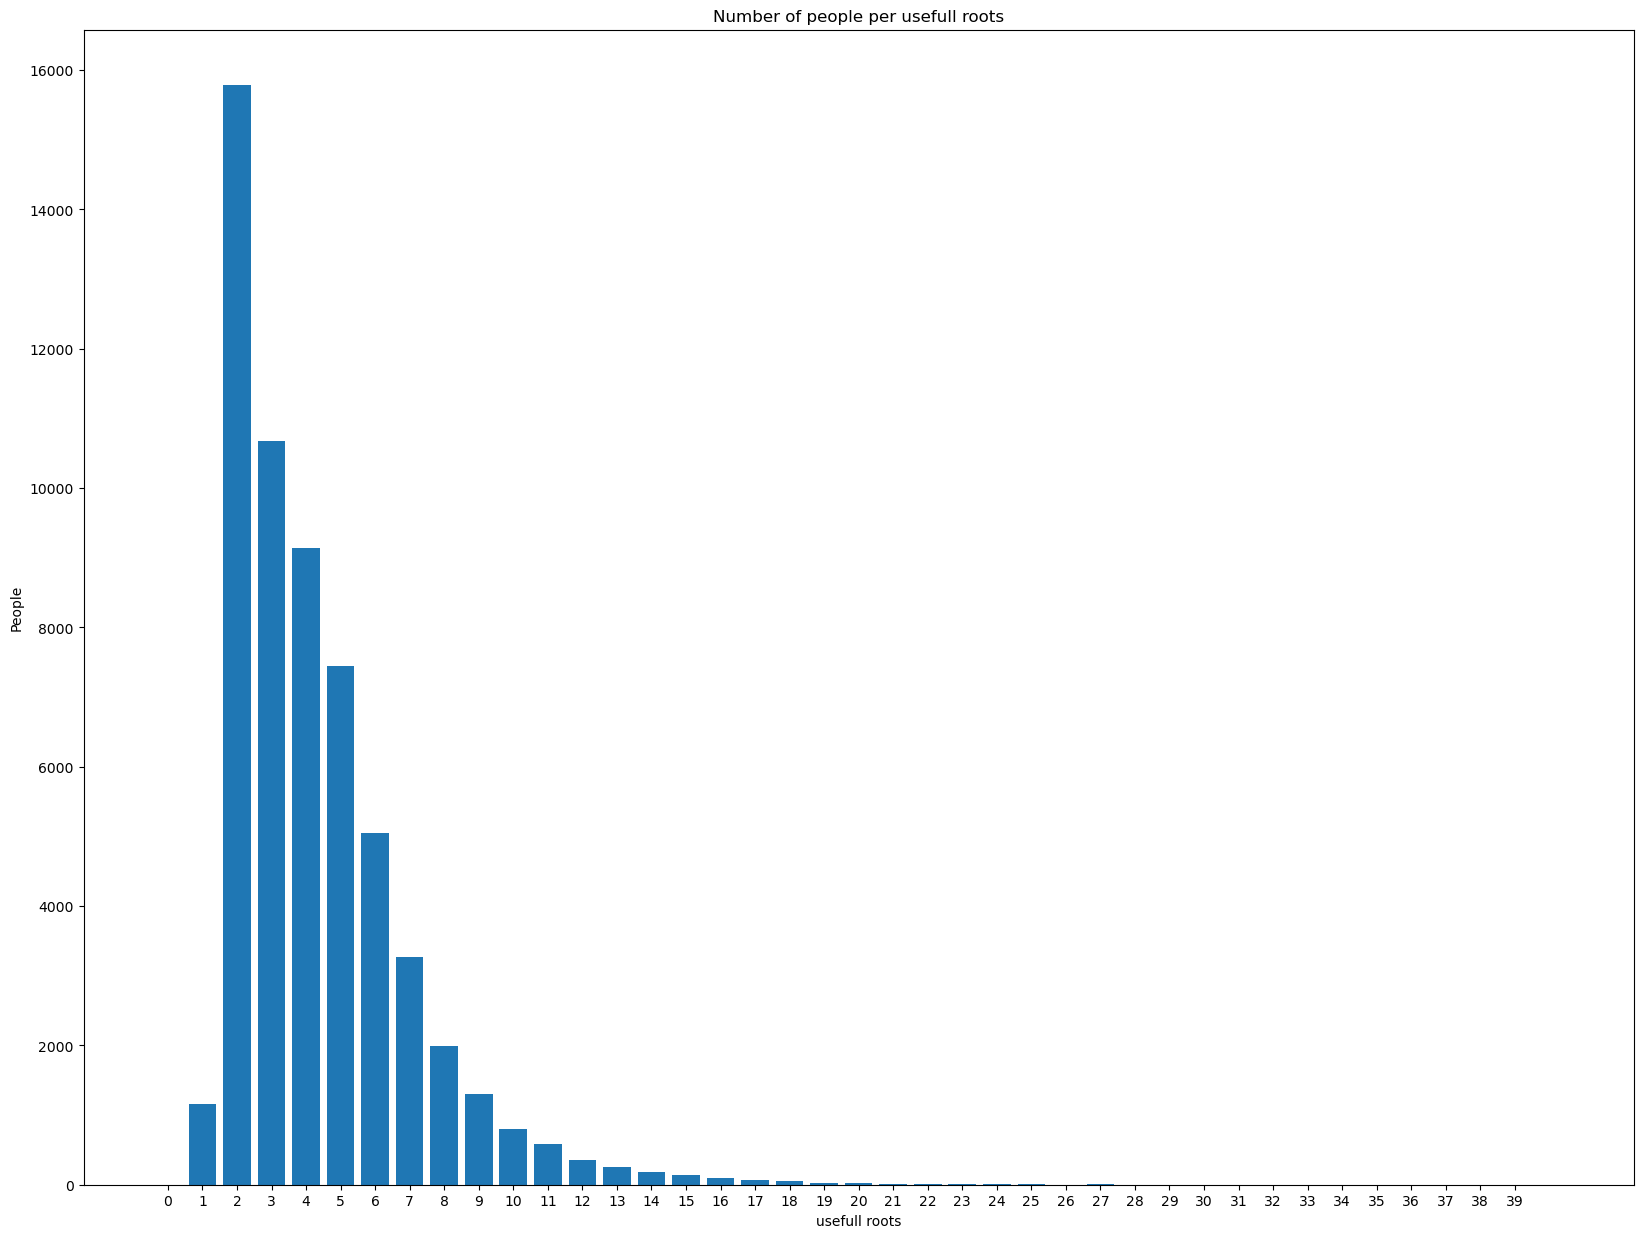

In [19]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
unlabeled_non_pol = non_politic[non_politic.is_labeled]
display(unlabeled_non_pol)
display(unlabeled_non_pol.columns)
stuff = [unlabeled_non_pol['useful roots'][unlabeled_non_pol['useful roots'] == x].count() for x in indexes]
print(stuff)
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

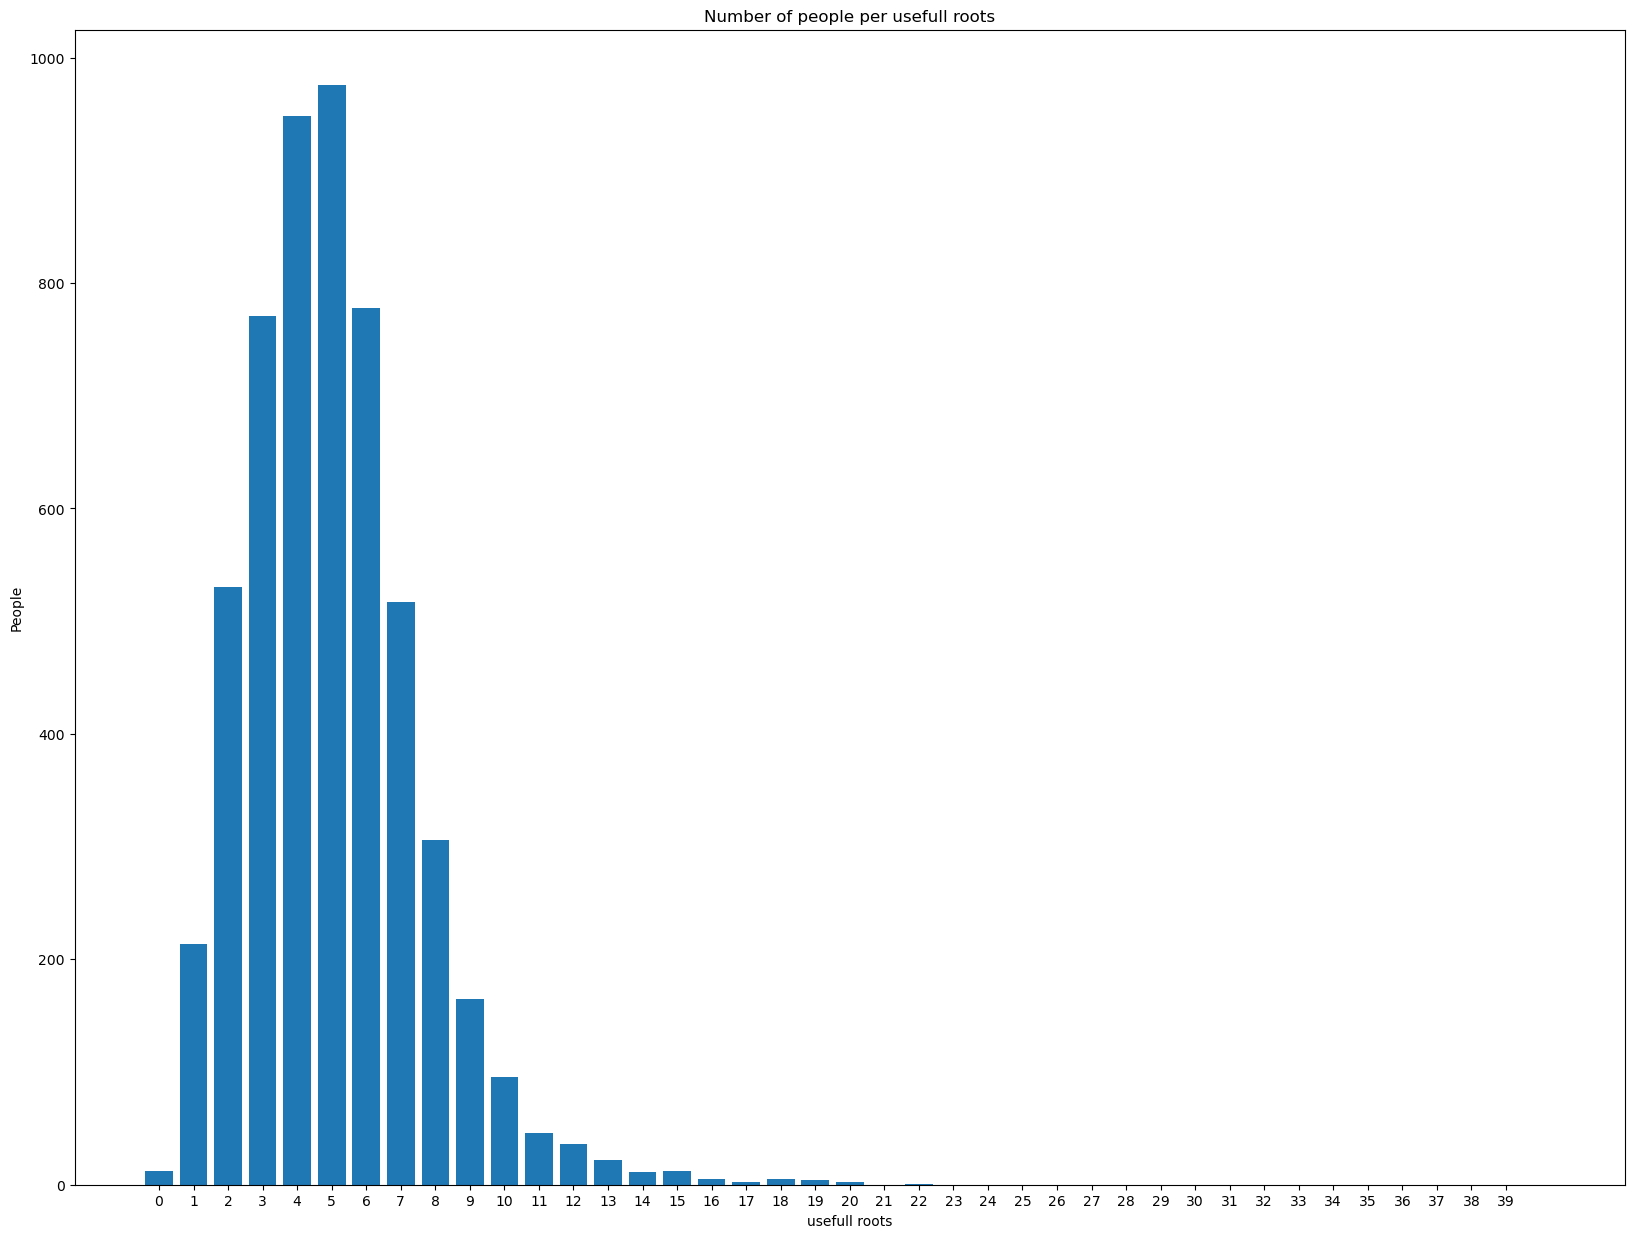

In [20]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(non_politic['useful roots'].max() + 1)))
stuff = [non_politic['useful roots'][non_politic['useful roots'] == x][~non_politic.is_labeled].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

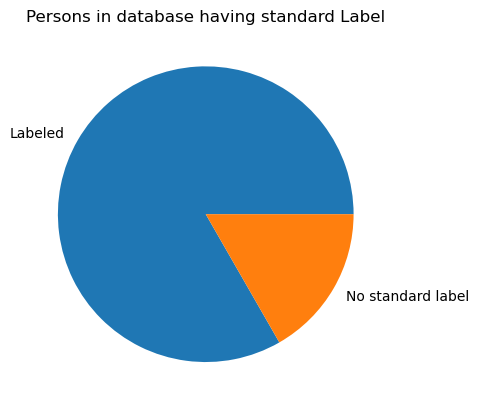

In [21]:
labels = 'Labeled', 'No standard label'
total_size = len(df.index)
labeled_size = df.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database having standard Label")
plt.show()

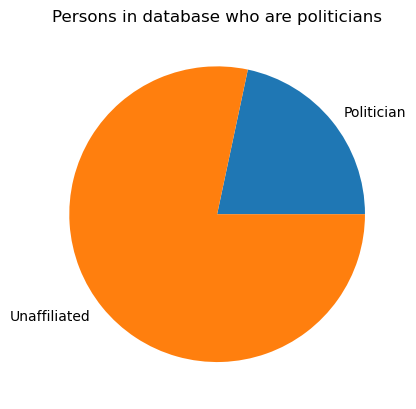

In [22]:
labels = 'Politician', 'Unaffiliated'
total_size = len(df.index)
labeled_size = df.is_pol.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Persons in database who are politicians")
plt.show()

In [23]:
non_politic_bag.sum().sort_values(ascending=False).head(20)

vzít        12398
sport        8495
umět         8303
zp           7015
registr      7005
řídit        6940
business     6854
kult         6821
spolu        4590
vést         4112
řada         3653
akademie     3619
zdravý       3570
mluvit       3087
nový         2986
čech         2697
tát          2504
sedět        2444
pravý        2062
hrát         1764
dtype: Sparse[int64, 0]

In [24]:
non_politic_bag[non_politic.is_labeled].sum().sort_values(ascending=False).head(20)

vzít        12211
sport        8470
umět         8271
business     6849
kult         6807
řídit        5727
spolu        4486
zp           4443
registr      4431
vést         3640
akademie     3595
řada         3567
zdravý       3496
mluvit       3080
nový         2966
čech         2429
tát          2341
sedět        2193
pravý        1786
hrát         1726
dtype: Sparse[int64, 0]

In [25]:
non_politic_bag[~non_politic.is_labeled].sum().sort_values(ascending=False).head(30)

registr        2574
zp             2572
sociál         1352
řídit          1213
no              572
vést            472
dům             288
pravý           276
čech            268
učit            268
centr           266
sociální        261
sedět           251
práce           246
nadace          189
vzít            187
plzeň           183
ordinovat       167
tát             163
sloužit         162
rada            161
organizovat     153
senior          150
charita         144
manager         135
dítě            130
projekt         129
být             128
město           115
trenér          110
dtype: Sparse[int64, 0]

In [26]:
print(len(non_politic_bag[~non_politic.is_labeled]))
print(len(non_politic_bag[non_politic.is_labeled]))

5459
58480


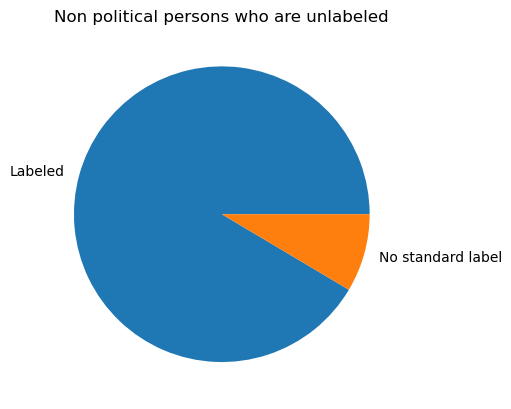

In [27]:
labels = 'Labeled', 'No standard label'
total_size = len(non_politic)
labeled_size = non_politic.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Non political persons who are unlabeled")
plt.show()

In [28]:
politic = df[df.is_pol].copy()

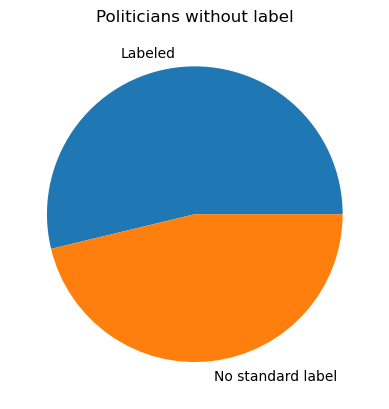

In [29]:
labels = 'Labeled', 'No standard label'
total_size = len(politic)
labeled_size = politic.is_labeled.sum()
unlabeled_size = total_size - labeled_size

sizes = [labeled_size/total_size, unlabeled_size/total_size]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
ax.set_title("Politicians without label")
plt.show()

In [30]:
non_politic_bag.sum().sort_values(ascending=True).head(20)

žďársko         2
jablotron       2
jablonný        2
spravedlivý     2
jabkenice       2
spíš            2
squash          2
israel          2
squater         2
island          2
iráčan          2
irán            2
srbsko          2
irsku           2
iron            2
iris            2
srnec           2
inzert          2
intelligence    2
interagovat     2
dtype: Sparse[int64, 0]

In [31]:
from scipy.sparse import csr_matrix

data_matrix = csr_matrix(non_politic_bag.sparse.to_coo())

In [32]:
from sklearn.cluster import KMeans

def kmean_explore(data, max_clusters: int) -> list:
    scores = []
    
    for i in range(2, max_clusters+1):
        km = KMeans(n_clusters=i, n_init=10)
        km.fit(data_matrix)
        score = km.score(data_matrix)
        scores.append(np.abs(score))
    return scores

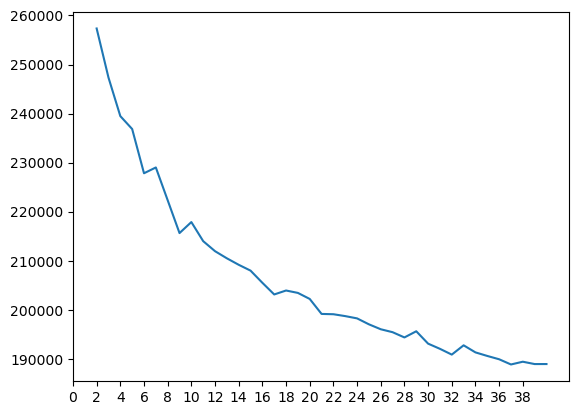

CPU times: user 5min 2s, sys: 6min 19s, total: 11min 21s
Wall time: 54.7 s


In [33]:
%%time
max_cluster = 40
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.xticks(list(range(0, max_cluster, 2)))
plt.show()

In [34]:
km = KMeans(n_clusters=18, n_init=10)

predictions = km.fit_predict(data_matrix)

In [35]:
for a in set(predictions):
    print(a)
    print(len(non_politic_bag[predictions == a]))
    display(non_politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

0
8289


vzít            8289
řídit           1055
historie         599
učit             477
škola            455
architektura     437
vést             384
spolu            326
kládat           283
id               270
tát              259
čech             245
psychologie      232
zdravý           222
sedět            206
rada             189
archeologie      181
umět             166
koumat           163
restaurovat      162
dtype: Sparse[int64, 0]





1
9330


zdravý       2591
spolu        2214
mluvit       1198
lék          1089
sedět         979
chránit       736
pravý         566
stát          555
moci          543
čech          520
no            471
advokát       446
vést          442
zastoupit     370
aktivní       342
soudit        341
prima         338
hasit         305
díl           283
kraj          278
dtype: Sparse[int64, 0]





2
6229


sport         6229
hokej         1239
trenér        1033
vést           328
volejbal       303
basketbal      282
hodit          225
spolu          220
sedět          207
cyklistika     206
tennis         205
čech           203
atletika       201
id             188
lyže           188
florbal        184
řídit          163
běžet          151
být            136
club           123
dtype: Sparse[int64, 0]





3
963


církev             963
fara               336
kněz               177
biskup              62
evangelium          53
římskokatolický     49
kaple               46
kostel              38
duch                37
katolík             37
praga               31
severovýchod        30
id                  30
obec                30
moci                28
žid                 27
českobratrský       25
brno                25
pravý               24
člen                22
dtype: Sparse[int64, 0]





4
2146


nový             2145
čro               863
redigovat         739
publicistika      233
moderovat         195
pravý             189
reportáž          145
šéfredaktor       109
hlas               98
kult               80
čech               72
komentovat         57
den                56
vést               53
autor              53
spolupracovat      50
edice              49
housle             49
čt                 46
zp                 44
dtype: Sparse[int64, 0]





5
2844


řada        2844
vzít         889
vést         815
řídit        487
město        422
správa       238
kraj         231
díl          215
pravý        202
magistr      168
ministr      161
střed        157
mít          157
mluvit       155
čech         148
práce        135
žít          120
náměstek     115
sloužit      114
stát         113
dtype: Sparse[int64, 0]





6
51


fotbal          50
sport           50
sigm            40
olomouc         35
trenér          14
sigma            6
desky            5
hák              4
brána            3
zp               3
letět            3
řídit            3
registr          3
devatenáctka     2
id               2
sedět            2
být              2
manager          2
mladý            2
mluvit           2
dtype: Sparse[int64, 0]





7
1450


brojit        1450
policie        639
velet          196
mluvit         188
řídit          185
střežit        158
město          139
pár            135
vést           134
kriminál       110
kraj           100
mezzopiano      98
čr              90
pravý           87
díl             66
vězet           62
zastoupit       61
prevence        60
vojen           58
vzít            44
dtype: Sparse[int64, 0]





8
562


tvořit        562
umět          557
kult           57
sklo           20
kurátor        19
registr        18
vzít           18
zp             18
malovat        17
id             17
kostým         17
galerie        17
autor          16
design         14
karta          14
akademie       12
ilustrovat     11
psát           10
spolu           9
socha           9
dtype: Sparse[int64, 0]





9
4852


business      4852
spolu          585
mít            489
manager        358
vést           349
jednat         344
vzít           328
stát           303
mluvit         290
firma          272
tát            227
sedět          218
vézt           207
čech           179
kult           157
id             156
podniknout     148
pravý          120
zastoupit      109
sport          107
dtype: Sparse[int64, 0]





10
6683


umět          6683
hrát          1346
režie          699
psát           487
housle         484
zpívat         475
fotografie     394
malovat        376
kult           286
autor          209
dívat          184
socha          166
tanec          153
kapela         130
muzika         129
id             128
skládat        123
scéna          112
dirigovat      107
bát            103
dtype: Sparse[int64, 0]





11
1696


řídit        1696
kult          986
muzeum        199
festival      184
zdravý        184
spolu         156
učit          129
no            123
kniha         101
moci          100
město          87
vzít           83
centr          81
čech           78
umět           76
zastoupit      66
chránit        61
dívat          60
tát            51
škola          51
dtype: Sparse[int64, 0]





12
3086


akademie      3086
univerzita     752
tát            692
vzít           678
fakulta        622
uk             416
vědět          407
katedra        296
čr             260
vést           238
čt             211
čech           190
koumat         190
historie       174
děkan          169
karlov         146
studio         142
centr          134
všechen        124
biologie       121
dtype: Sparse[int64, 0]





13
1390


fotbal      1390
sport       1386
trenér       174
registr      144
zp           144
být           89
fungovat      43
id            38
spolu         33
čech          30
mrk           29
rozhodit      28
sedět         27
club          27
mladý         22
karviná       22
prah          20
baník         20
brána         20
ostrav        19
dtype: Sparse[int64, 0]





14
1431


řídit        1431
business     1431
spolu         196
stát          148
generel       133
jít           127
konat          79
čech           74
id             70
vzít           65
firma          64
tát            62
marketing      58
vézt           52
robit          47
technika       47
centr          41
sport          39
pravý          37
kult           37
dtype: Sparse[int64, 0]





15
6745


registr     6745
zp          6744
řídit       1194
vzít        1049
mluvit       860
čech         683
sport        500
sedět        482
nový         473
umět         467
spolu        451
business     449
pravý        435
vést         433
kult         428
řada         413
tát          409
akademie     380
být          373
čr           372
dtype: Sparse[int64, 0]





16
1564


sociál         1564
řídit           530
vést            316
dům             264
sociální        252
charita         197
centr           197
práce           193
senior          145
sloužit         130
ordinovat       105
dítě             87
církev           82
pečovat          78
spolu            66
rada             65
organizovat      60
projekt          57
zdravý           55
rod              53
dtype: Sparse[int64, 0]





17
4628


kult           4628
kurátor         854
muzeum          836
vzít            789
vést            461
tát             415
festival        324
organizovat     290
drama           271
umět            247
historie        240
kniha           219
dívat           195
galerie         175
mluvit          160
kastelán        157
autor           157
spolu           149
řada            144
město           141
dtype: Sparse[int64, 0]

In [36]:
with open('model/non_pol.model', 'bw+') as f:
    pickle.dump(km, f)

In [37]:
normal_bag = to_bag_of_words(df.lemmatized, is_string=False)[~df.is_pol]

In [ ]:
for a in set(predictions):
    print(a)
    print(len(normal_bag[predictions == a]))
    display(normal_bag[predictions == a].sum().sort_values(ascending=False).head(10))
    print('\n\n\n')

0
8289


odborník     7811
ředitel       582
ředitelka     450
historik      413
škola         411
vedoucí       358
učitel        350
architekt     325
ido           270
spolek        231
dtype: Sparse[int64, 0]





1
9330


zdravotník    2541
spolek        2128
mluvčí        1197
záchranář      634
předseda       624
lékař          550
český          480
no             471
nemocnice      469
právník        438
dtype: Sparse[int64, 0]





2


## Politician Analysis

In [ ]:
politic_bag = to_bag_of_words(politic.roots, is_string=False)
politic_bag = politic_bag.loc[:, politic_bag.sum() > 1].copy()

In [ ]:
politic_bag.sum().sort_values(ascending=False).head(20)

In [ ]:
len(politic)

In [ ]:
politic['useful roots'] = politic_bag.parallel_apply(lambda row: row.sum(), axis=1)

In [ ]:
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [politic['useful roots'][politic['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

In [ ]:
used = politic[politic.is_labeled]
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [used['useful roots'][used['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

In [ ]:
used = politic[~politic.is_labeled]
plt.figure(figsize=(20, 15))
indexes = list(range(0, int(politic['useful roots'].max() + 1)))
stuff = [used['useful roots'][used['useful roots'] == x].count() for x in indexes]
plt.bar(indexes, stuff)
plt.title('Number of people per usefull roots')
plt.ylabel('People')
plt.xlabel('usefull roots')
plt.xticks(list(range(40)))
plt.show()

In [ ]:

data_matrix = csr_matrix(politic_bag.sparse.to_coo())

In [ ]:
%%time
max_cluster = 40
cluster_n = list(range(2, max_cluster+1))
scores = kmean_explore(data_matrix, max_cluster)

plt.plot(cluster_n, scores)
plt.xticks(list(range(0, max_cluster, 2)))
plt.show()

In [ ]:
km = KMeans(n_clusters=18, n_init=10)

predictions = km.fit_predict(data_matrix)

In [ ]:
for a in set(predictions):
    print(a)
    print(len(politic_bag[predictions == a]))
    display(politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

In [ ]:
norm_politic_bag = to_bag_of_words(politic.lemmatized, is_string=False)

In [ ]:
for a in set(predictions):
    print(a)
    print(len(politic_bag[predictions == a]))
    display(norm_politic_bag[predictions == a].sum().sort_values(ascending=False).head(20))
    print('\n\n\n')

In [ ]:
with open('model/pol.model', 'bw+') as f:
    pickle.dump(km, f)